In [1]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import math
import isingmodellight
from isingmodellight import IsingModelLight
from scipy import stats
import time
import hcpdatautils as hcp

int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

file_dir = 'E:\\Ising_model_results_daai'

training_index_start = 0
training_index_end = 670

In [2]:
def depytorch(t:torch.Tensor):
    return t.detach().cpu().numpy()

In [3]:
def print_stats(name:str, values:torch.Tensor):
    values = values.flatten()
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} values has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

In [10]:
def make_histogram(axs, name:str, values:torch.Tensor):
    # print(axs)
    axs.hist(  depytorch( values.flatten() )  )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name}')

The distribution of mean values has median -0.367 with 95% CI [-1.69, 0.879] and range [-21.4, 16].
The distribution of variance values has median 1.43e+03 with 95% CI [280, 7.24e+03] and range [28.6, 4.24e+05].
The distribution of skewness values has median -0.021 with 95% CI [-0.875, 0.542] and range [-5.45, 6].
The distribution of kurtosis values has median 3.32 with 95% CI [2.51, 7.71] and range [1.98, 54.4].


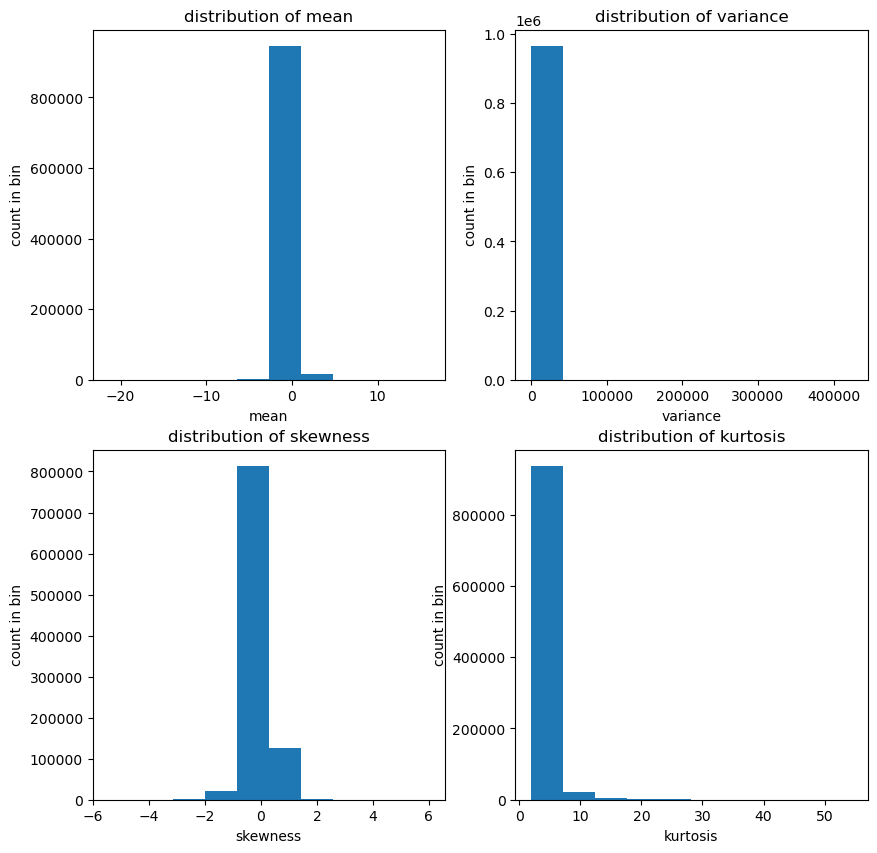

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for name, row, col in zip(['mean', 'variance', 'skewness', 'kurtosis'], [0, 0, 1, 1], [0, 1, 0, 1]):
    file = os.path.join(file_dir, f'{name}_data_ts_training_as_is.pt')
    values = torch.load(file)
    make_histogram(axs[row,col], name=name, values=values)
    print_stats(name=name, values=values)
plt.show()

In [16]:
print( math.sqrt(4.24e+05) )

651.1528238439882
